In [69]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import glob
import os
import glob
import shutil

path="example-p0.30000000000000004;a2.8e-07;l1.8000000000000002e-07;s0.out"

def loadFile(name):
    data=pd.read_csv(name,sep="\t")
    data["H"]=np.round(data["B_extx (T)"]*10000/(np.sqrt(2)/2))
    data["m_full"]=(data["m_fullx (A/m)"]+data["m_fully (A/m)"])/np.sqrt(2)
    data["m"]=data["m_full"]/np.max(np.abs(data["m_full"]))

    try: 
        data["hIsland_my"]=data["m_full.region1y (A/m)"]/np.max(np.sqrt(data["m_full.region1y (A/m)"]**2+data["m_full.region1x (A/m)"]**2))
    except Exception:
        pass
    

    data=data.drop(columns=["# t (s)",\
    "mz ()","mx ()", "my ()",\
    "B_extx (T)", "B_exty (T)","B_extz (T)",\
    "m_fullz (A/m)","m_fullx (A/m)","m_fully (A/m)",\
    "m_full.region1x (A/m)","m_full.region1y (A/m)","m_full.region1z (A/m)",\
    "m_full.region2x (A/m)","m_full.region2y (A/m)","m_full.region2z (A/m)"])

    try:
        data.attrs["Hc"]=np.average(np.abs(data[np.sign(data["m"]).diff() != 0]["H"].iloc[1:]))
        data.attrs["Br"]=np.average(np.abs(data[np.sign(data["H"]).diff() != 0]["m"].iloc[1:]))
    except Exception:
        pass


    return data

imagePaths=sorted(glob.glob(path+"/*.png"))[1:]
images=[]
data=loadFile(path+"/table.txt")

for imPath in imagePaths:
    im = plt.imread(imPath)
    images.append(im)

#Load "images" and "data"


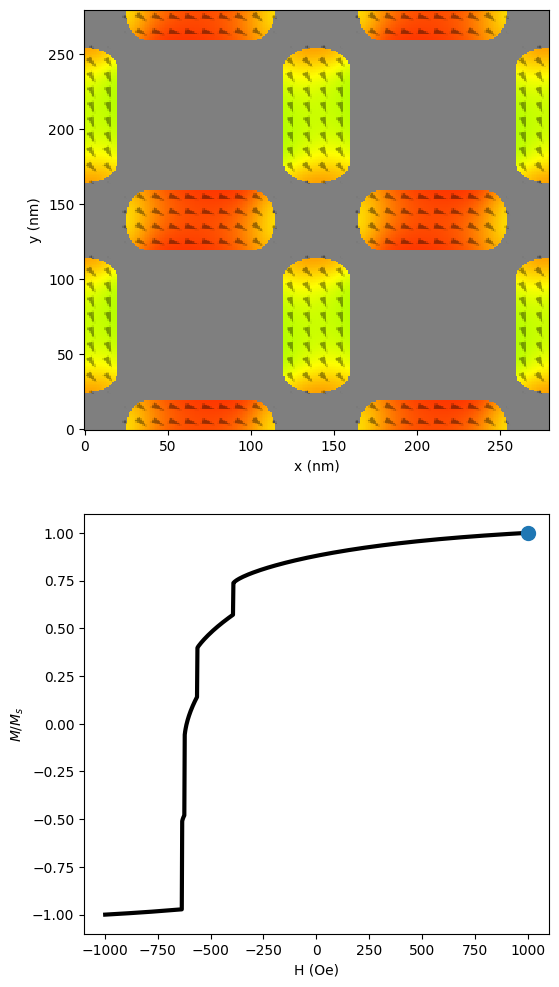

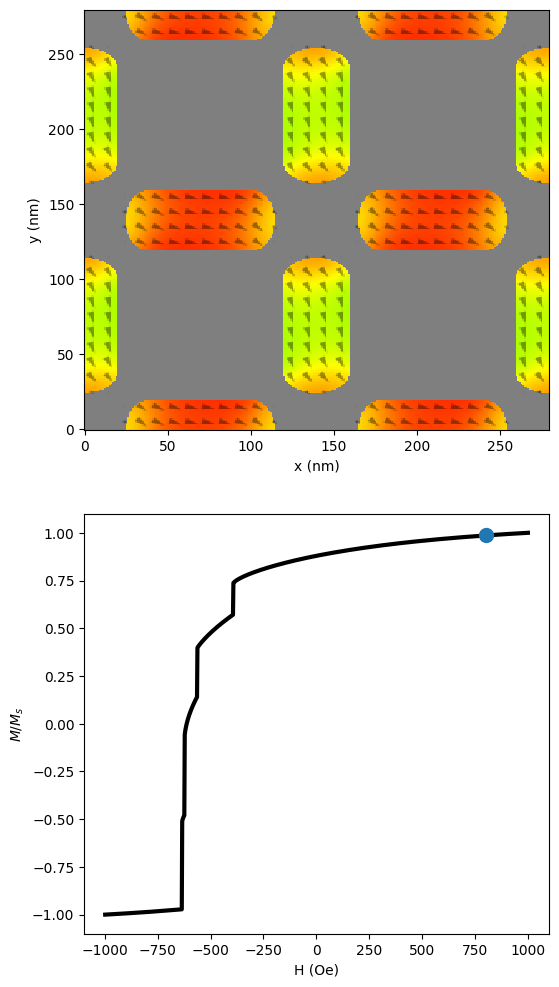

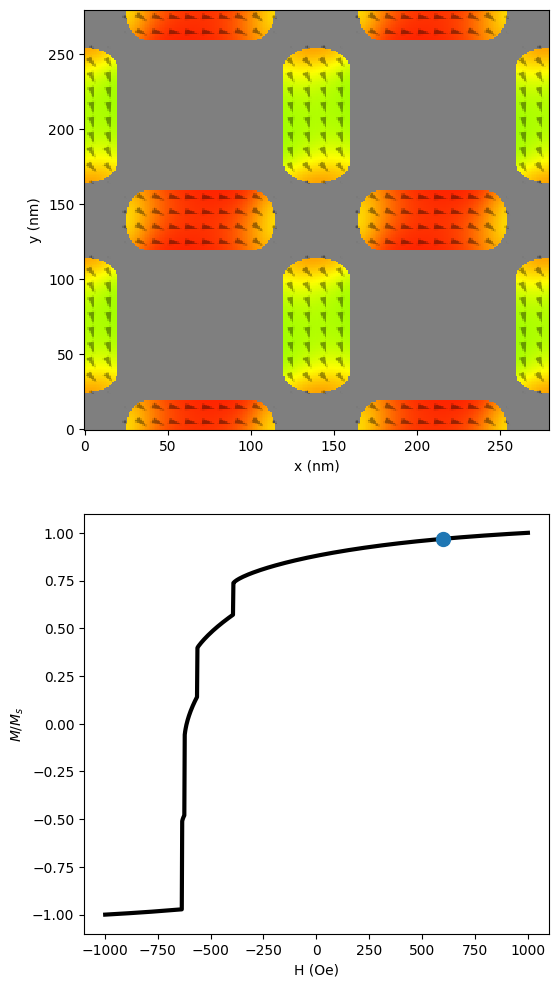

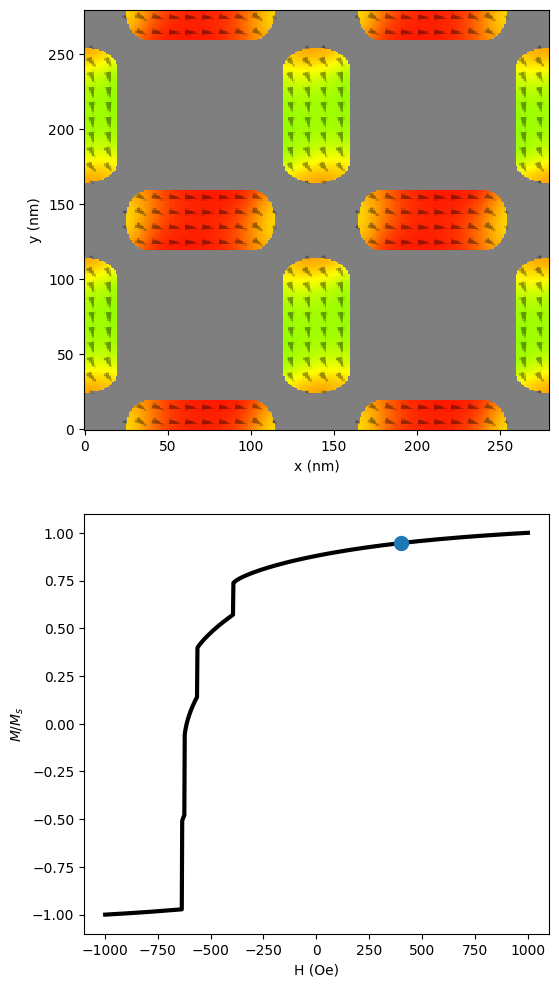

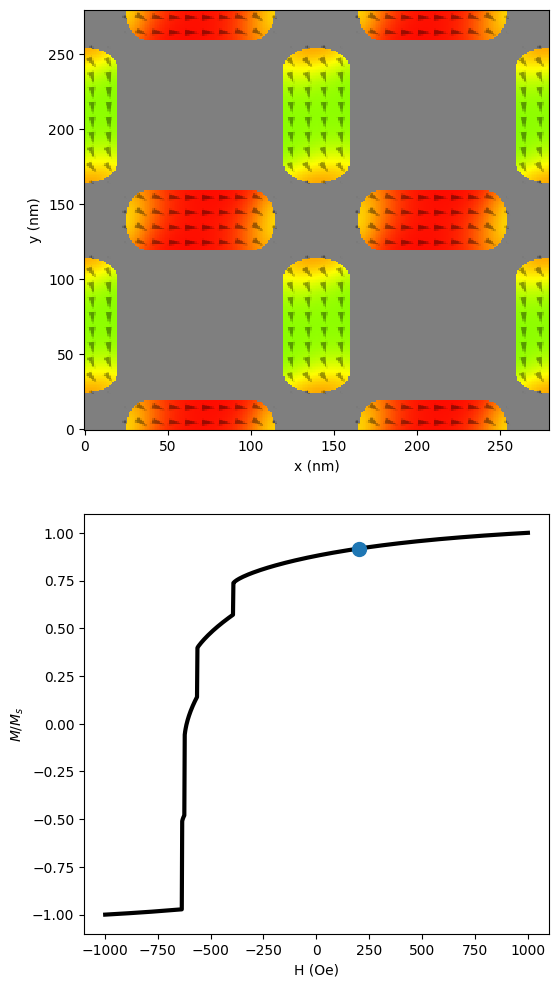

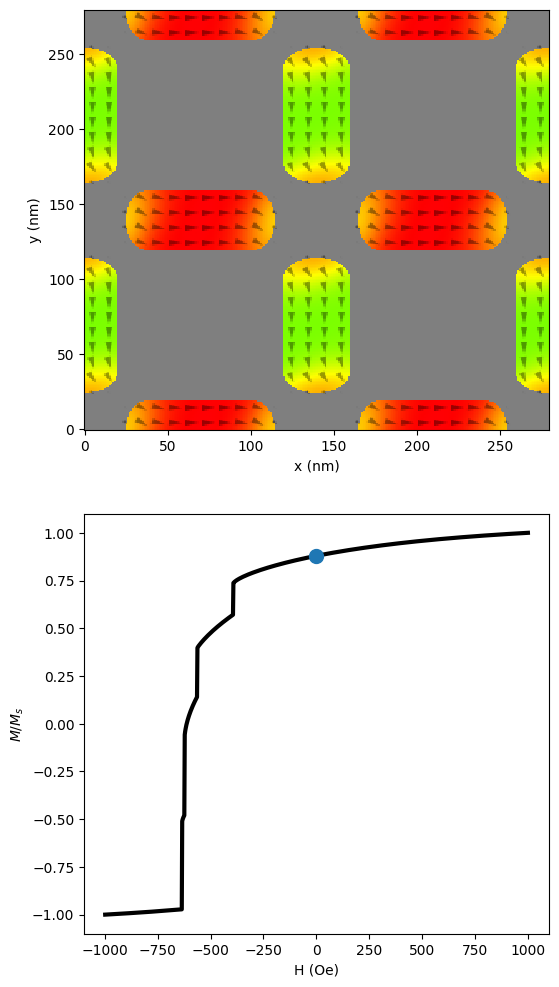

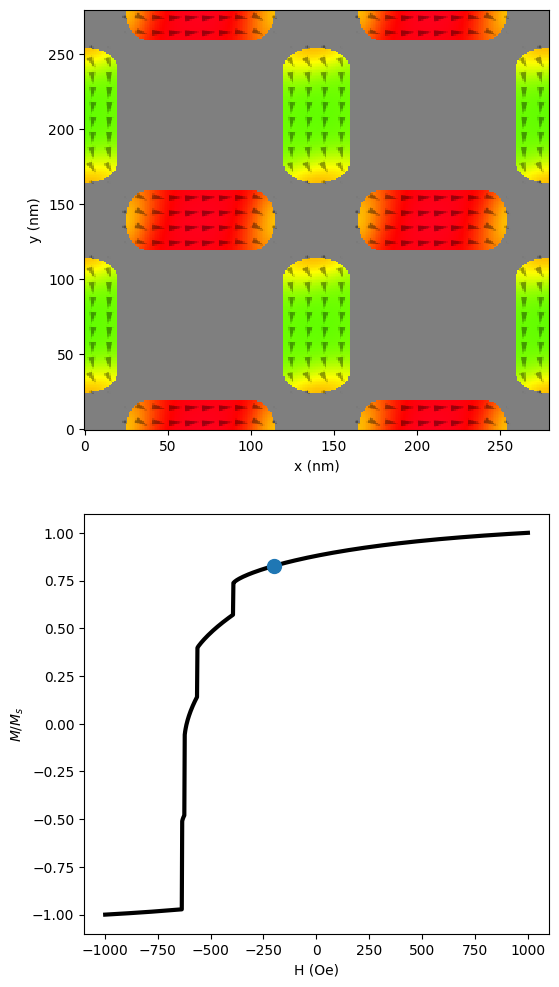

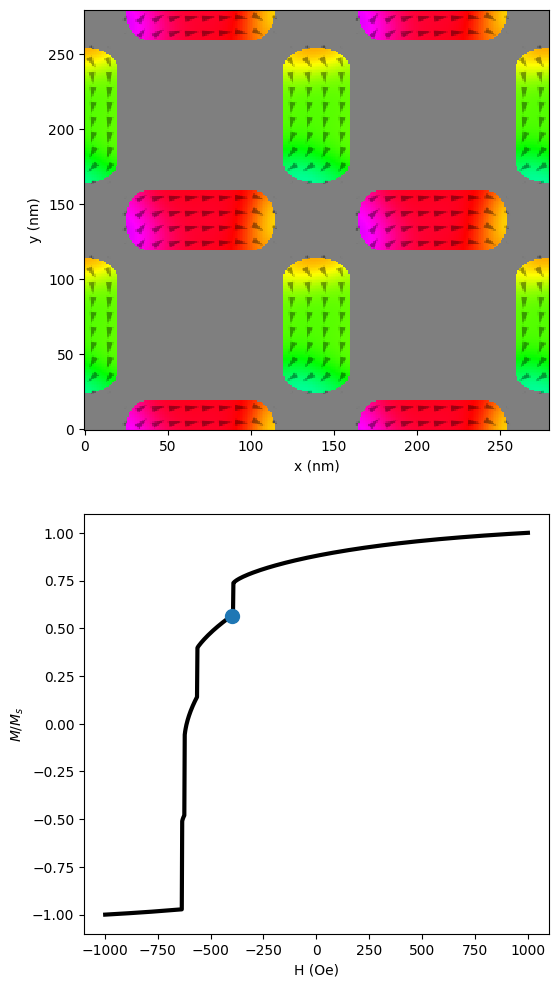

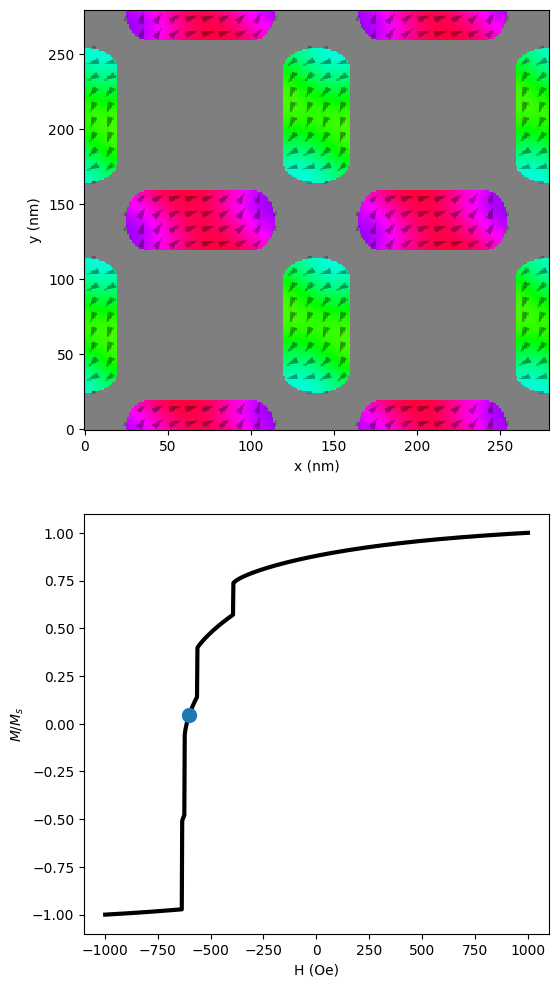

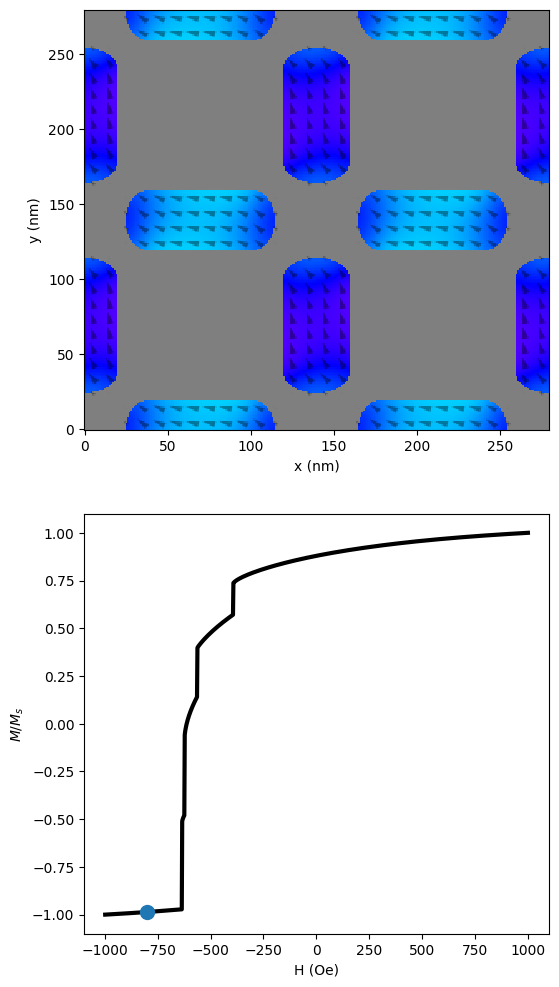

In [74]:
assert len(images)==len(data)



#Make temporary directory
current_directory = os.getcwd()
final_directory = os.path.join(current_directory, r'Temp Files')
if os.path.exists(final_directory):
   shutil.rmtree(final_directory)
os.makedirs(final_directory)



for i in range(len(images)):

   if i%100!=0: continue

   fig,(imAx,pltAx)=plt.subplots(2,1)
   fig.set_size_inches(6, 12)

   thisRow=data.loc[i,:]

   imAx.imshow(images[i],interpolation='nearest', aspect='auto')
   imAx.invert_yaxis()
   imAx.set_xlabel("x (nm)")
   imAx.set_ylabel("y (nm)")

   pltAx.plot(data["H"],data["m"],lw=3,color="k")

   
   pltAx.scatter(thisRow["H"],thisRow["m"],s=100,zorder=10)
   pltAx.set_xlabel("H (Oe)")
   pltAx.set_ylabel("$M$/$M_s$")
   

   

   plt.savefig(final_directory+f"/{i}.png")

